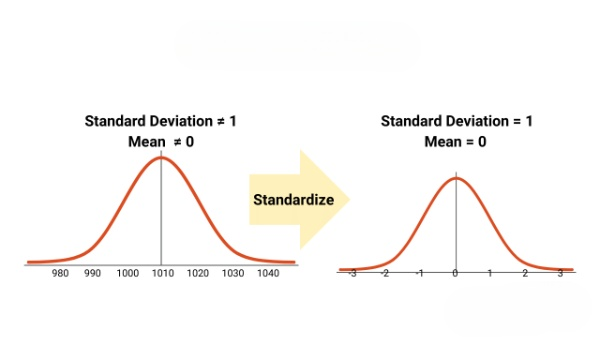

# Standrization in Machine Learning

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Now Train Test Spilit

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis=1),
                                                   df['Purchased'],
                                                   test_size = 0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

### Standerdscaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [12]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [13]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [14]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Now set the scaling

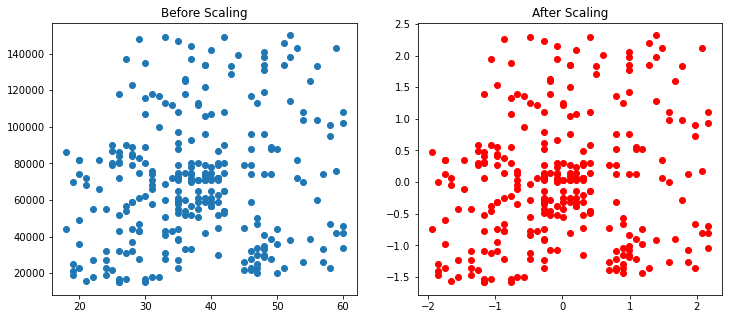

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

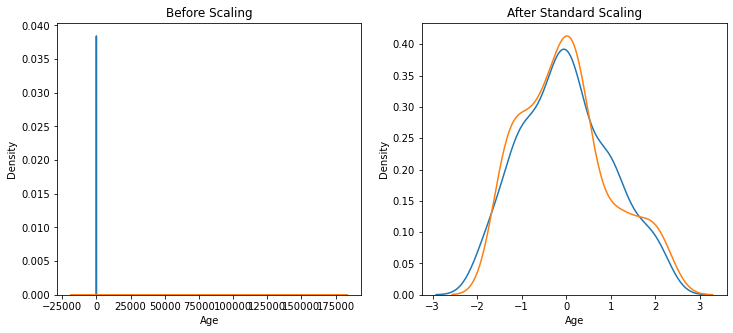

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Comparison of Distributions

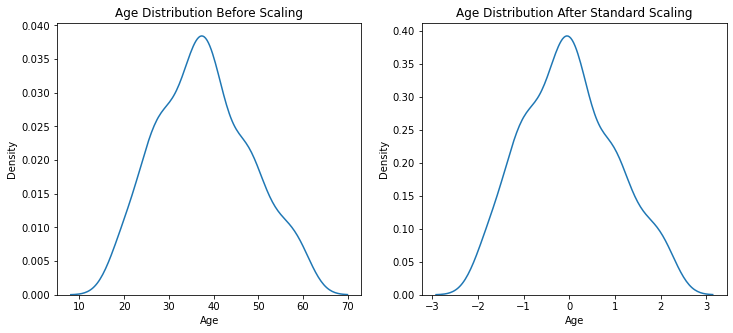

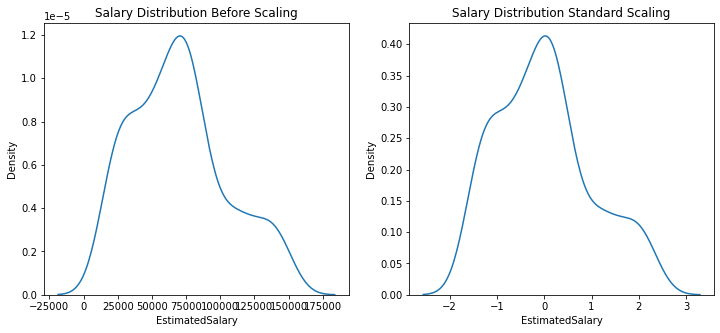

In [18]:
#Age  Dist.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

#Salry Dist.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Importance of Scaling

### From Logistis Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
#Creat lr function
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [21]:
#Fit the train and scaled datsset of LR
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [22]:
#Now it's time to prediction
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [23]:
#Findout Acc. Score
from sklearn.metrics import accuracy_score

In [24]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


### From DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
#Creat DT function
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [27]:
#Fit the train and scaled datsset of LR
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [28]:
#Now it's time to prediction
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [29]:
#Findout Acc. Score
from sklearn.metrics import accuracy_score

In [30]:
#It's better than LogisticsRegression
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [31]:
#See the standrization our data
df.describe()


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [32]:
#Now let's check the model.

#Dummy values
df = df.append(pd.DataFrame({'Age':[10,85,70],'EstimatedSalary':[2500,450000,250000],'Purchased':[0,1,1]}),ignore_index=True)

In [33]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,10,2500,0
401,85,450000,1


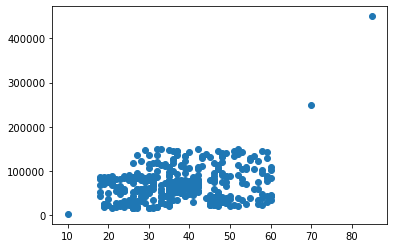

In [34]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis=1),
                                                   df['Purchased'],
                                                   test_size = 0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
scaler.mean_

array([3.81489362e+01, 6.98528369e+04])

In [38]:
X_train

,Age,EstimatedSalary
179,31,34000
219,59,143000
302,37,137000
49,31,89000
241,38,59000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [39]:
X_train_scaled

array([[-6.60321806e-01, -8.84542567e-01],
       [ 1.92593860e+00,  1.80464881e+00],
       [-1.06123147e-01,  1.65661993e+00],
       [-6.60321806e-01,  4.72388862e-01],
       [-1.37567043e-02, -2.67755554e-01],
       [ 1.55647283e+00,  1.48391956e+00],
       [-1.12215402e+00, -1.35330070e+00],
       [ 8.17541284e-01, -4.89798878e-01],
       [ 1.37173994e+00, -8.84542567e-01],
       [ 1.00227417e+00,  1.75530585e+00],
       [ 1.74120572e+00,  1.28654772e+00],
       [ 2.01830504e+00,  7.93118109e-01],
       [-1.30688691e+00, -1.25461477e+00],
       [ 7.25174841e-01,  4.47717381e-01],
       [-3.83222477e-01,  1.11384736e+00],
       [-9.37421136e-01, -2.67755554e-01],
       [ 1.00227417e+00, -7.61185164e-01],
       [-7.52688249e-01,  2.25674057e-01],
       [ 8.17541284e-01,  9.16475511e-01],
       [ 6.32808398e-01, -1.08191441e+00],
       [-1.37567043e-02, -4.89798878e-01],
       [-2.90856034e-01, -4.89798878e-01],
       [-6.60321806e-01,  1.02316654e-01],
       [ 3.

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [41]:
print(X_train_scaled)
print(X_test_scaled)

          Age  EstimatedSalary
0   -0.660322        -0.884543
1    1.925939         1.804649
2   -0.106123         1.656620
3   -0.660322         0.472389
4   -0.013757        -0.267756
..        ...              ...
277  0.909908        -0.983228
278 -0.845055        -0.662499
279 -0.198490        -0.440456
280 -1.029788        -0.391113
281 -1.122154         1.187862

[282 rows x 2 columns]
          Age  EstimatedSalary
0   -0.290856        -1.180600
1    0.355709         0.126988
2   -0.567955         1.163190
3   -0.937421         0.423046
4   -1.306887        -0.292427
..        ...              ...
116 -0.290856        -1.106586
117 -0.383222        -1.106586
118 -0.290856        -0.489799
119 -0.106123        -0.317099
120  0.817541        -0.514470

[121 rows x 2 columns]


In [42]:
print(np.round(X_train.describe(), 1))
print(np.round(X_train_scaled.describe(), 1))

         Age  EstimatedSalary
count  282.0            282.0
mean    38.1          69852.8
std     10.8          40604.7
min     10.0           2500.0
25%     30.0          43000.0
50%     37.0          68000.0
75%     46.0          86750.0
max     85.0         450000.0
         Age  EstimatedSalary
count  282.0            282.0
mean     0.0             -0.0
std      1.0              1.0
min     -2.6             -1.7
25%     -0.8             -0.7
50%     -0.1             -0.0
75%      0.7              0.4
max      4.3              9.4


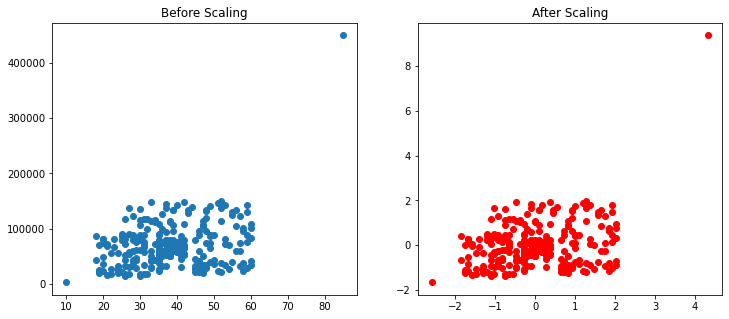

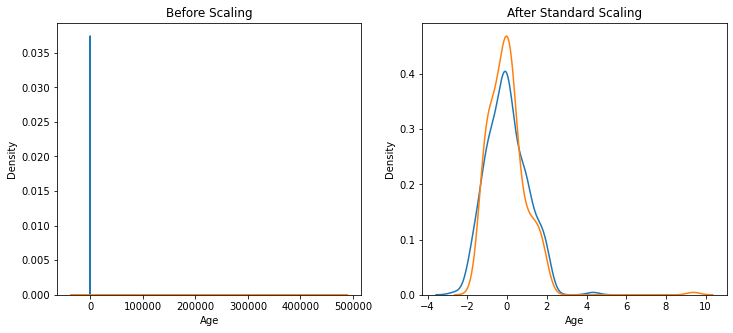

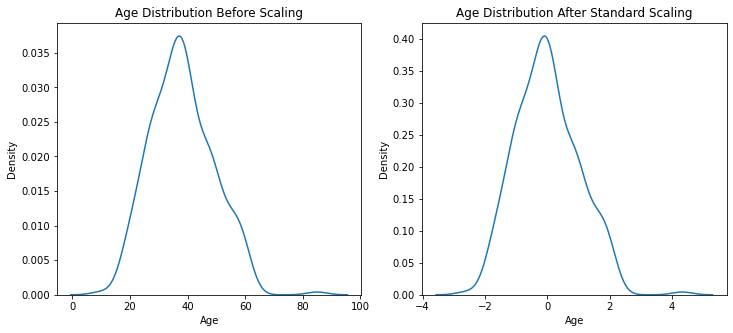

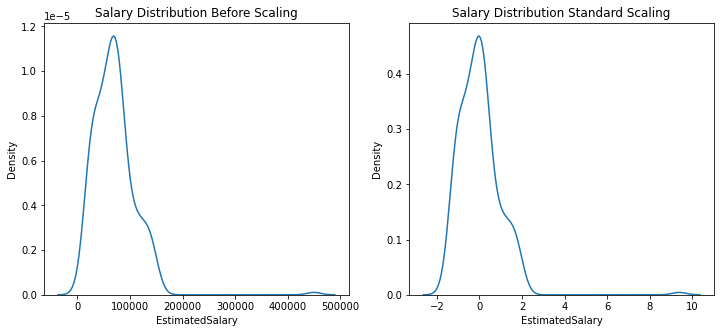

In [43]:
#A
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

#B
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

#C
#Age  Dist.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

#Salry Dist.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [44]:
#From Logistics regression

from sklearn.linear_model import LogisticRegression

#Creat lr function
lr = LogisticRegression()
lr_scaled = LogisticRegression()

#Fit the train and scaled datsset of LR
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

#Now it's time to prediction
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

#Findout Acc. Score
from sklearn.metrics import accuracy_score

print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.6446280991735537
Scaled 0.8512396694214877


In [45]:
#From DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

#Creat lr function
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

#Fit the train and scaled datsset of LR
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

#Now it's time to prediction
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

#Findout Acc. Score
from sklearn.metrics import accuracy_score

print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.8760330578512396
Scaled 0.8760330578512396


# Conclusion

### We saw without outliers:
#### Our acc. score for with LR is: Acctual=65 and Scaled=86
#### Our acc. score for with DT is: Acctual=87 and Scaled=87

### We saw with outliers:
#### Our acc. score for with LR is: Acctual=64 and Scaled=85
#### Our acc. score for with DT is: Acctual=87 and Scaled=87

### Effects of Outliers in Data:
#### 1. Reduces quality. Outliers’ due to measurement error implies poor quality data.
#### 2. Skews the mean of the data.
#### 3. Results to wrong analyses and misleading insights


## Outliers detection technique:
#### 1. Domain Knowledge
#### 2. Find Z-score
#### 3. Interquartile Range
#### 4. Boxplot
#### 5. Scatter plot
#### 6. Histogram
#### 7. Clustering techniques
#### 8. Isolation Forest
#### 9. Local Outlier Factor
#### 10. Minimum Covariance Determinant (MCD)